In [1]:
%run ../template.ipynb

In [2]:
exp_id = "050318"
series_names = ["mainstream", "maxsharing", "nosharing"]

In [3]:
setups = dataloaders.load_setups(exp_id, setup_file_str="/setups.{exp_id}-3{version}.pickle")
setups.update(dataloaders.load_setups(exp_id, setup_file_str="/setups.{exp_id}-4{version}.pickle"))

Loading setups... Done
Loading setups... Done


In [4]:
rows = []
for series_name in series_names:
    schedules = dataloaders.load_schedules("050318", "greedy." + series_name + ".sim.*-3.v1", setups=setups)
    schedules += dataloaders.load_schedules("050318", "greedy." + series_name + ".sim.*-4.v1", setups=setups)
    # Extract some attributes from the schedules.
    # Add on some based on the file name.
    rows += ex(schedules,
               each=lambda s: {'f1': mean(s.f1s), 'fps': mean(s.fpses), 'num_apps': s.num_apps, 'budget': s.budget},
               constant={'scheduler': 'greedy', 'sharing': series_name})
df = comb(rows)

In [5]:
# See Pandas: Group By: split-apply-combine
# https://pandas.pydata.org/pandas-docs/stable/groupby.html
df_view = df[df['budget'] == 100]
# Group <setups> by number of apps, aggregate by mean.
grouped = df_view.groupby(['sharing', 'num_apps'])

xss, yss = agg2xy(grouped['f1'].mean(), names=series_names)
series = get_series(xss, yss, series_names=series_names, plotparams=dict(lw=4, markersize=8))

xss2, yss2 = agg2xy(grouped['fps'].mean(), names=series_names)
plotstyles = [styles.SERIES_ALT[series_name] for series_name in series_names]
plotparams = dict(lw=3, markersize=8, alpha=0.7, linestyle='--')
series2 = [Series(x=xs, y=ys, name=sn, plotstyle=ps, plotparams=plotparams) for xs, ys, ps, sn in zip(xss2, yss2, plotstyles, series_names)]

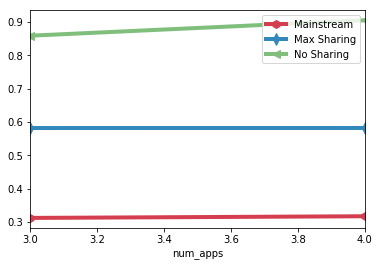

In [6]:
plot.variants(series)

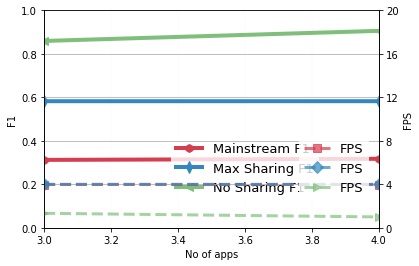

In [7]:
ax1, ax2 = plot.variants_dual(series, series2)
grids.y.f1(yss, ax=ax1)
grids.y.fps(yss2, ax=ax2)
grids.x.num_apps(xss, ax=ax1)
legends.dual_fps(ax1, ax2, left='F1')
save('scheduler', exp_id, 'f1-7hybrid-dual')